In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
## 读取数据
path1 = "datas/winequality-red.csv"
df1 = pd.read_csv(path1, sep=";")
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
path2 = "datas/winequality-white.csv"
df2 = pd.read_csv(path2, sep=";")
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df1['type'] = 1 # 设置数据类型为红葡萄酒

In [5]:
df2['type'] = 2 # 设置数据类型为白葡萄酒

In [6]:
# 合并两个df
df = pd.concat([df1,df2], axis=0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
## 异常数据处理
new_df = df.replace('?', np.nan)
datas = new_df.dropna(how = 'any') # 只要有列为空，就进行删除操作
print ("原始数据条数:%d；异常数据处理后数据条数:%d；异常数据条数:%d" % (len(df), len(datas), len(df) - len(datas)))

原始数据条数:6497；异常数据处理后数据条数:6497；异常数据条数:0


In [8]:
## 自变量名称
names = ["fixed acidity","volatile acidity","citric acid",
         "residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates",
         "alcohol", "type"]
## 因变量名称
quality = "quality"
## 提取自变量和因变量
X = datas[names]
Y = datas[quality]

In [12]:
## 数据分割
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
print ("训练数据条数:%d；数据特征个数:%d；测试数据条数:%d" % (X_train.shape[0], X_train.shape[1], X_test.shape[0]))


训练数据条数:4872；数据特征个数:12；测试数据条数:1625


In [15]:
# 2. 数据格式化(归一化)
# 将数据缩放到[0,1] 之前是StandardScaler这个类
ss = MinMaxScaler()
X_train = ss.fit_transform(X_train) ## 训练模型及归一化数据

X_test = ss.transform(X_test)

## 查看y值的范围和数理统计
print(Y_train.value_counts())

6    2132
5    1606
7     805
4     161
8     146
3      20
9       2
Name: quality, dtype: int64


In [17]:
from sklearn.linear_model import LogisticRegressionCV

# 3. 模型构建及训练
## multi_class: 分类方式参数；参数可选: ovr(默认)、multinomial；
#这两种方式在二元分类问题中，效果是一样的；在多元分类问题中，效果不一样
### ovr: one-vs-rest， 对于多元分类的问题，先将其看做二元分类，分类完成后，再迭代对其中一类继续进行二元分类 里面会有多个模型
### multinomial: many-vs-many（MVM）,即Softmax分类效果 只有一个模型
## class_weight: 特征权重参数

### Softmax算法相对于Logistic算法来讲，在sklearn中体现的代码形式来讲，主要只是参数的不同
# Softmax k个θ向量并不是表示有k个模型 底层只有一个模型 在模型中训练的是θ矩阵而非向量

lr = LogisticRegressionCV(fit_intercept=True, Cs=np.logspace(-5, 1, 100),
                          multi_class='multinomial', penalty='l2', solver='lbfgs')
lr.fit(X_train, Y_train)


/Users/liergou/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


LogisticRegressionCV(Cs=array([  1.00000e-05,   1.14976e-05, ...,   8.69749e+00,   1.00000e+01]),
           class_weight=None, cv=None, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='multinomial',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [18]:
# 4. 模型效果获取
r = lr.score(X_train, Y_train)
print("R值：", r)
print("特征稀疏化比率：%.2f%%" % (np.mean(lr.coef_.ravel() == 0) * 100))
print("参数：",lr.coef_)
print("截距：",lr.intercept_)

print("概率：", lr.predict_proba(X_test))
# 获取概率函数返回的概率值
print("概率有多少：", lr.predict_proba(X_test).shape)


R值： 0.549876847291
特征稀疏化比率：0.00%
参数： [[ 0.97472007  2.16242935 -0.41752645 -0.49161126  0.90216414  1.44145457
   0.75308895  0.23067286  0.0078835  -0.69449678 -0.71640281 -0.29395089]
 [ 0.62563956  5.12454701 -0.38294497 -2.15884814  1.21130688 -3.71578923
  -1.45811418  1.33866652  0.33947    -0.86718864 -2.75030317  2.02977303]
 [-1.73592418  1.95965602  0.48836755 -1.91276215  0.64413009 -1.6772767
   2.20522141  1.49079941 -1.36112525 -2.23752715 -5.01601056 -0.75502664]
 [-1.19687037 -2.60962481 -0.34534452  0.17308798 -0.04150451  0.81597708
  -0.28249113  0.51686803 -0.67803729  0.18336015  0.01982862 -0.71330469]
 [ 1.15576787 -4.66714309 -0.30753144  2.21166257 -2.00289274  1.66872932
  -1.02959038 -2.14827924  0.8073902   2.68666278  3.36585535 -0.73448451]
 [-0.07797995 -1.827219    0.69487453  2.07693781 -0.62375666  1.49126555
  -0.15879103 -1.36535725  0.72579711  1.06872566  4.69162344  0.04720551]
 [ 0.254647   -0.14264549  0.2701053   0.10153318 -0.0894472  -0.02436

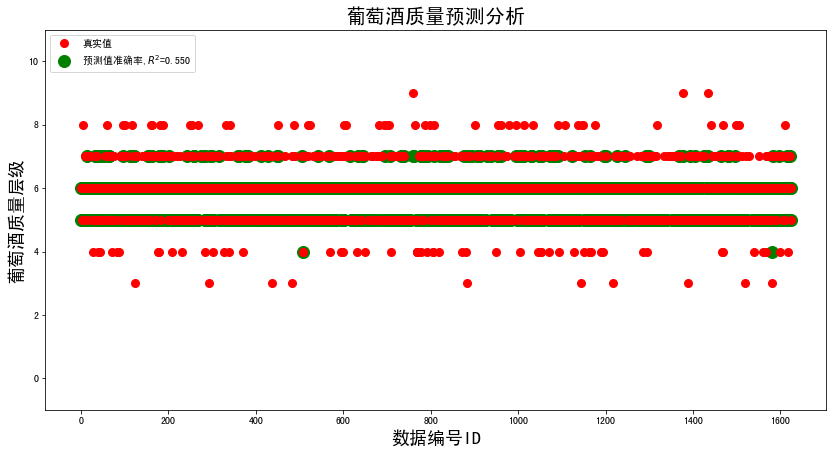

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
# 数据预测
## a. 预测数据格式化(归一化)
## b. 结果数据预测
Y_predict = lr.predict(X_test)


## c. 图表展示
x_len = range(len(X_test))
plt.figure(figsize=(14,7), facecolor='w')
plt.ylim(-1,11)
plt.plot(x_len, Y_test, 'ro',markersize = 8, zorder=3, label=u'真实值')
plt.plot(x_len, Y_predict, 'go', markersize = 12, zorder=2, label=u'预测值准确率,$R^2$=%.3f' % lr.score(X_train, Y_train))
plt.legend(loc = 'upper left')
plt.xlabel(u'数据编号ID', fontsize=18)
plt.ylabel(u'葡萄酒质量层级', fontsize=18)
plt.title(u'葡萄酒质量预测分析', fontsize=20)
plt.show()